In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/divyasandiman/Downloads/Automobile_insurance_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### 1) There are 39 columns with no NAN values in dataset.
### 2) There are 40 columns and 1000 rows.
### 3) There are 21 object type(categorical) features and 17 int64 and 2 float64, total of 19 numerical features
### 4)_c39 column has no entries can be dropped

In [23]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [24]:
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [31]:
df.drop(['policy_number','_c39'],axis=1,inplace=True)

In [32]:
cat_cols=[col for col in df.columns if df[col].dtypes=='O']

In [35]:
num_cols=[col for col in df.columns if df[col].dtypes!='O']

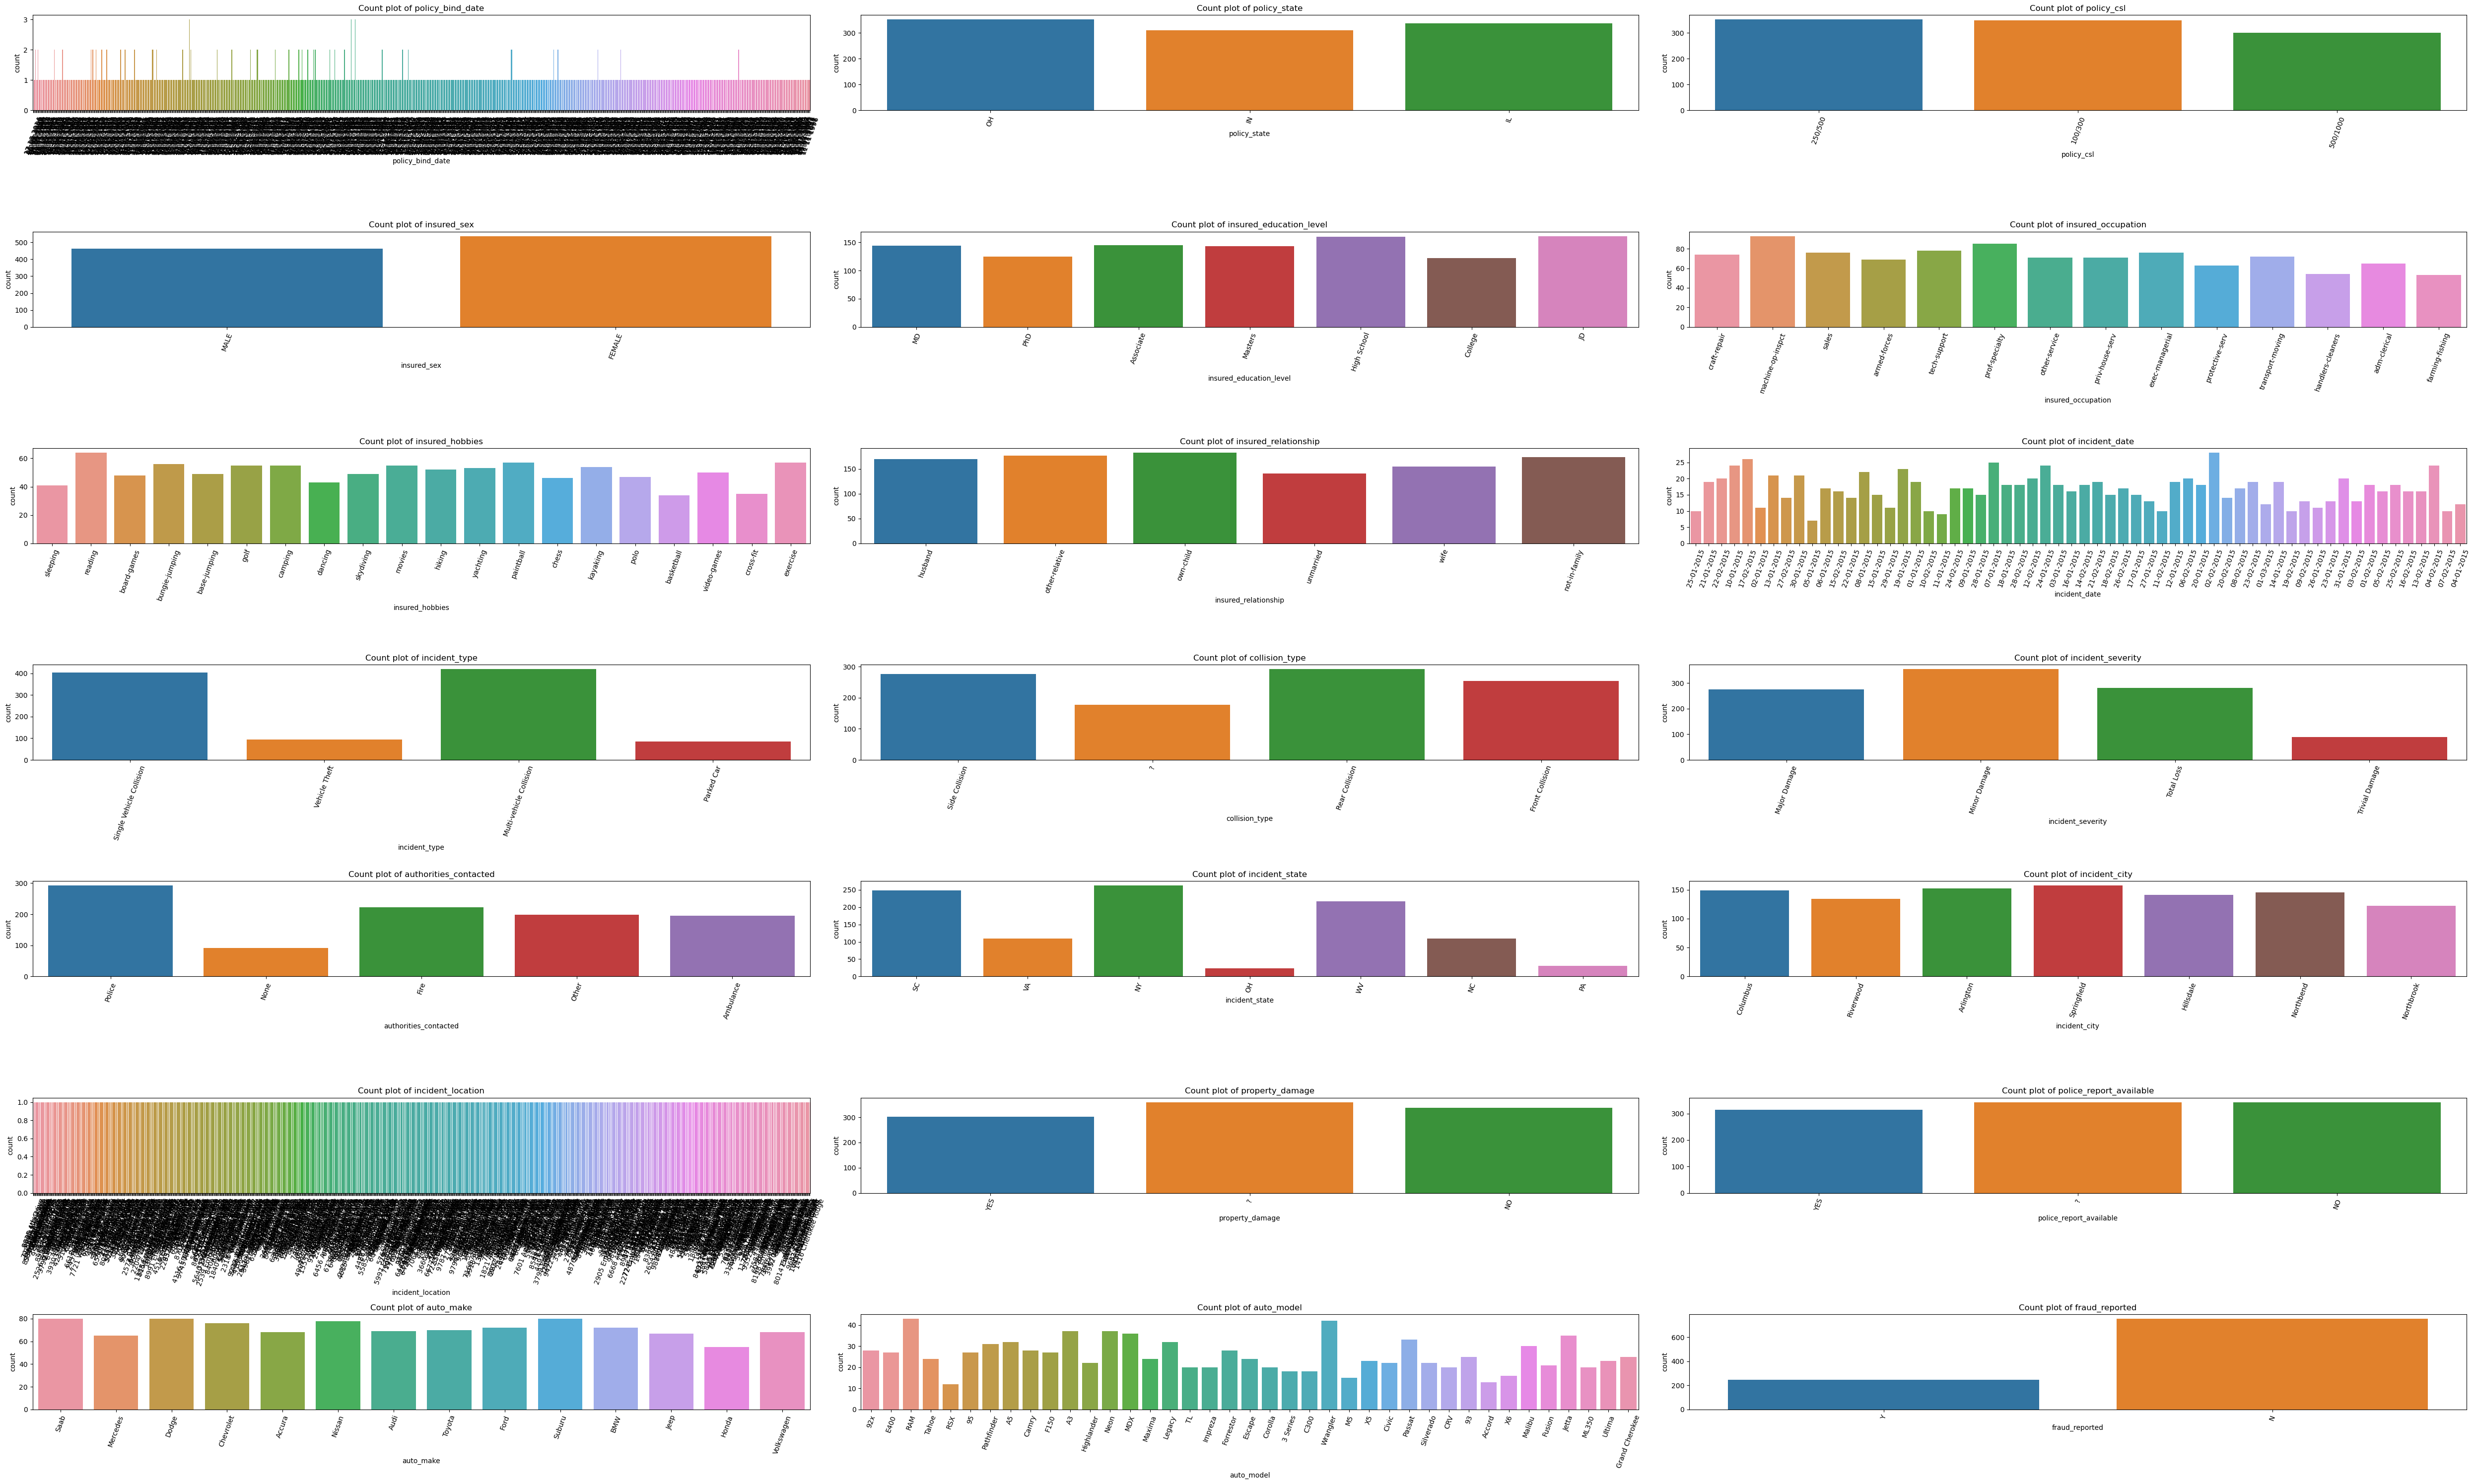

In [43]:
plt.figure(figsize=(50,30))
for i,col in enumerate(cat_cols):
    plt.subplot(7,3,i+1)
    sns.countplot(x=df[col],data=df)
    plt.xlabel(col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation =70)
plt.tight_layout()
plt.show()

In [44]:
for i in df.columns:
    print('----------------------------------')
    print(f'Value Count for {i}')
    print(df[i].value_counts())
    print('----------------------------------')
    

----------------------------------
Value Count for months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
----------------------------------
----------------------------------
Value Count for age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
----------------------------------
----------------------------------
Value Count for policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-1

In [51]:
df[df.isin(['?']).any(axis=1)]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
6,137,34,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [52]:
for i in cat_cols:
    df[i]=df[i].str.strip()

In [53]:
df.columns[df.isin(['?']).any()]

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [57]:
df[['collision_type', 'property_damage', 'police_report_available']]

,collision_type,property_damage,police_report_available
0,Side Collision,YES,YES
1,?,?,?
2,Rear Collision,NO,NO
3,Front Collision,?,NO
4,?,NO,NO
...,...,...,...
995,Front Collision,YES,?
996,Rear Collision,YES,?
997,Side Collision,?,YES
998,Rear Collision,?,YES


In [59]:
df.groupby(df['collision_type'].isin(['?']))['fraud_reported'].value_counts()

collision_type  fraud_reported
False           N                 591
                Y                 231
True            N                 162
                Y                  16
Name: fraud_reported, dtype: int64

In [60]:
df.groupby(df['property_damage'].isin(['?']))['fraud_reported'].value_counts()

property_damage  fraud_reported
False            N                 496
                 Y                 144
True             N                 257
                 Y                 103
Name: fraud_reported, dtype: int64

In [61]:
df.groupby(df['police_report_available'].isin(['?']))['fraud_reported'].value_counts()

police_report_available  fraud_reported
False                    N                 499
                         Y                 158
True                     N                 254
                         Y                  89
Name: fraud_reported, dtype: int64

In [64]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [65]:
df[['collision_type', 'property_damage', 'police_report_available']]=df[['collision_type', 'property_damage', 'police_report_available']].replace('?','Unknown')

In [66]:
df.columns[df.isin(['?']).any()]

Index([], dtype='object')

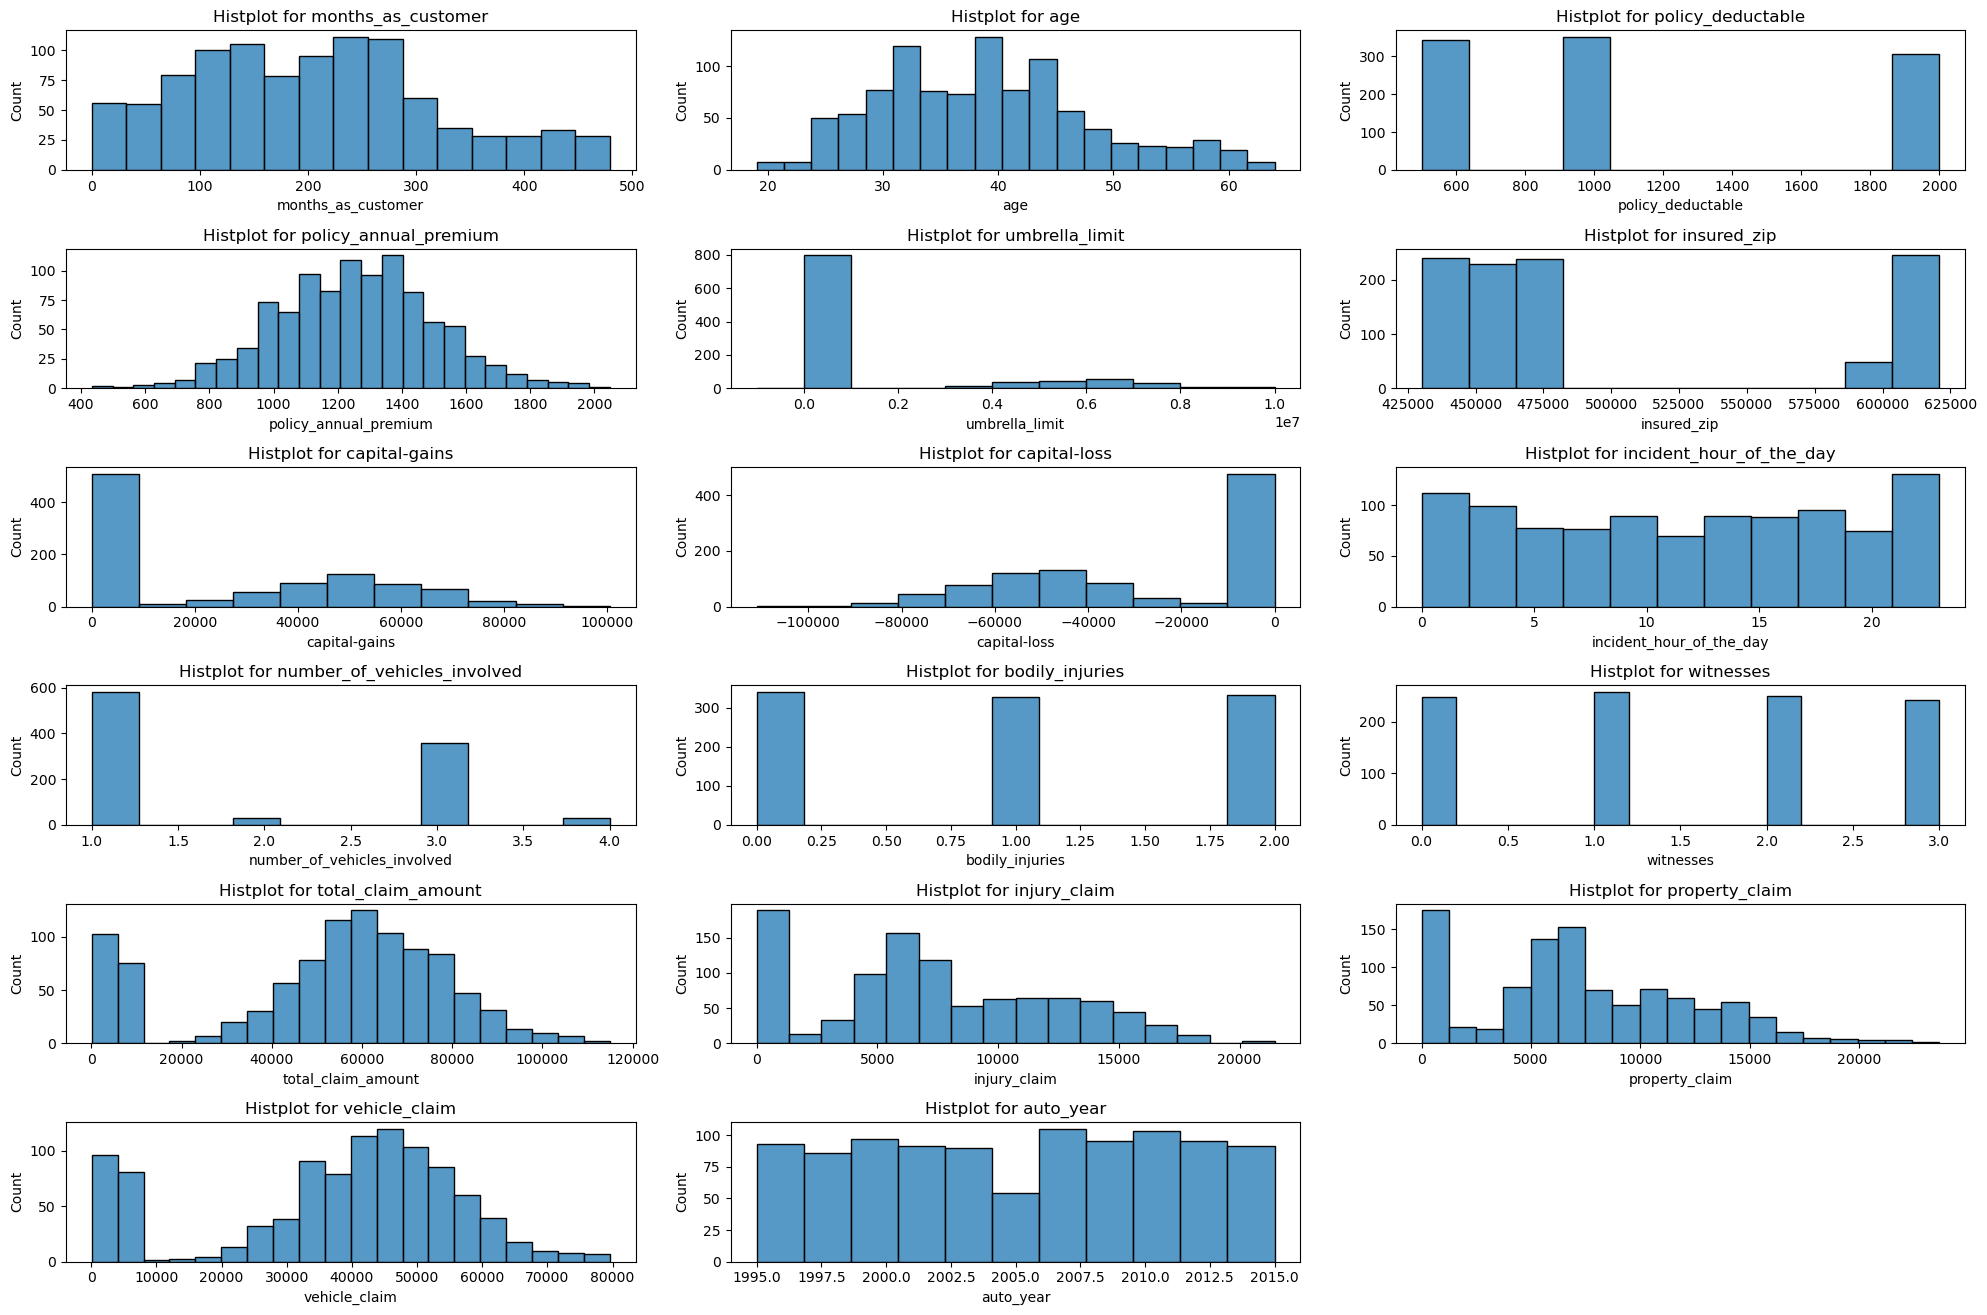

In [69]:
plt.figure(figsize=(20,15))
for num,i in enumerate(num_cols):
    plt.subplot(7,3,num+1)
    sns.histplot(x=df[i],data=df)
    plt.title(f'Histplot for {i}')
    plt.xlabel(i)
plt.tight_layout()
plt.show()
    

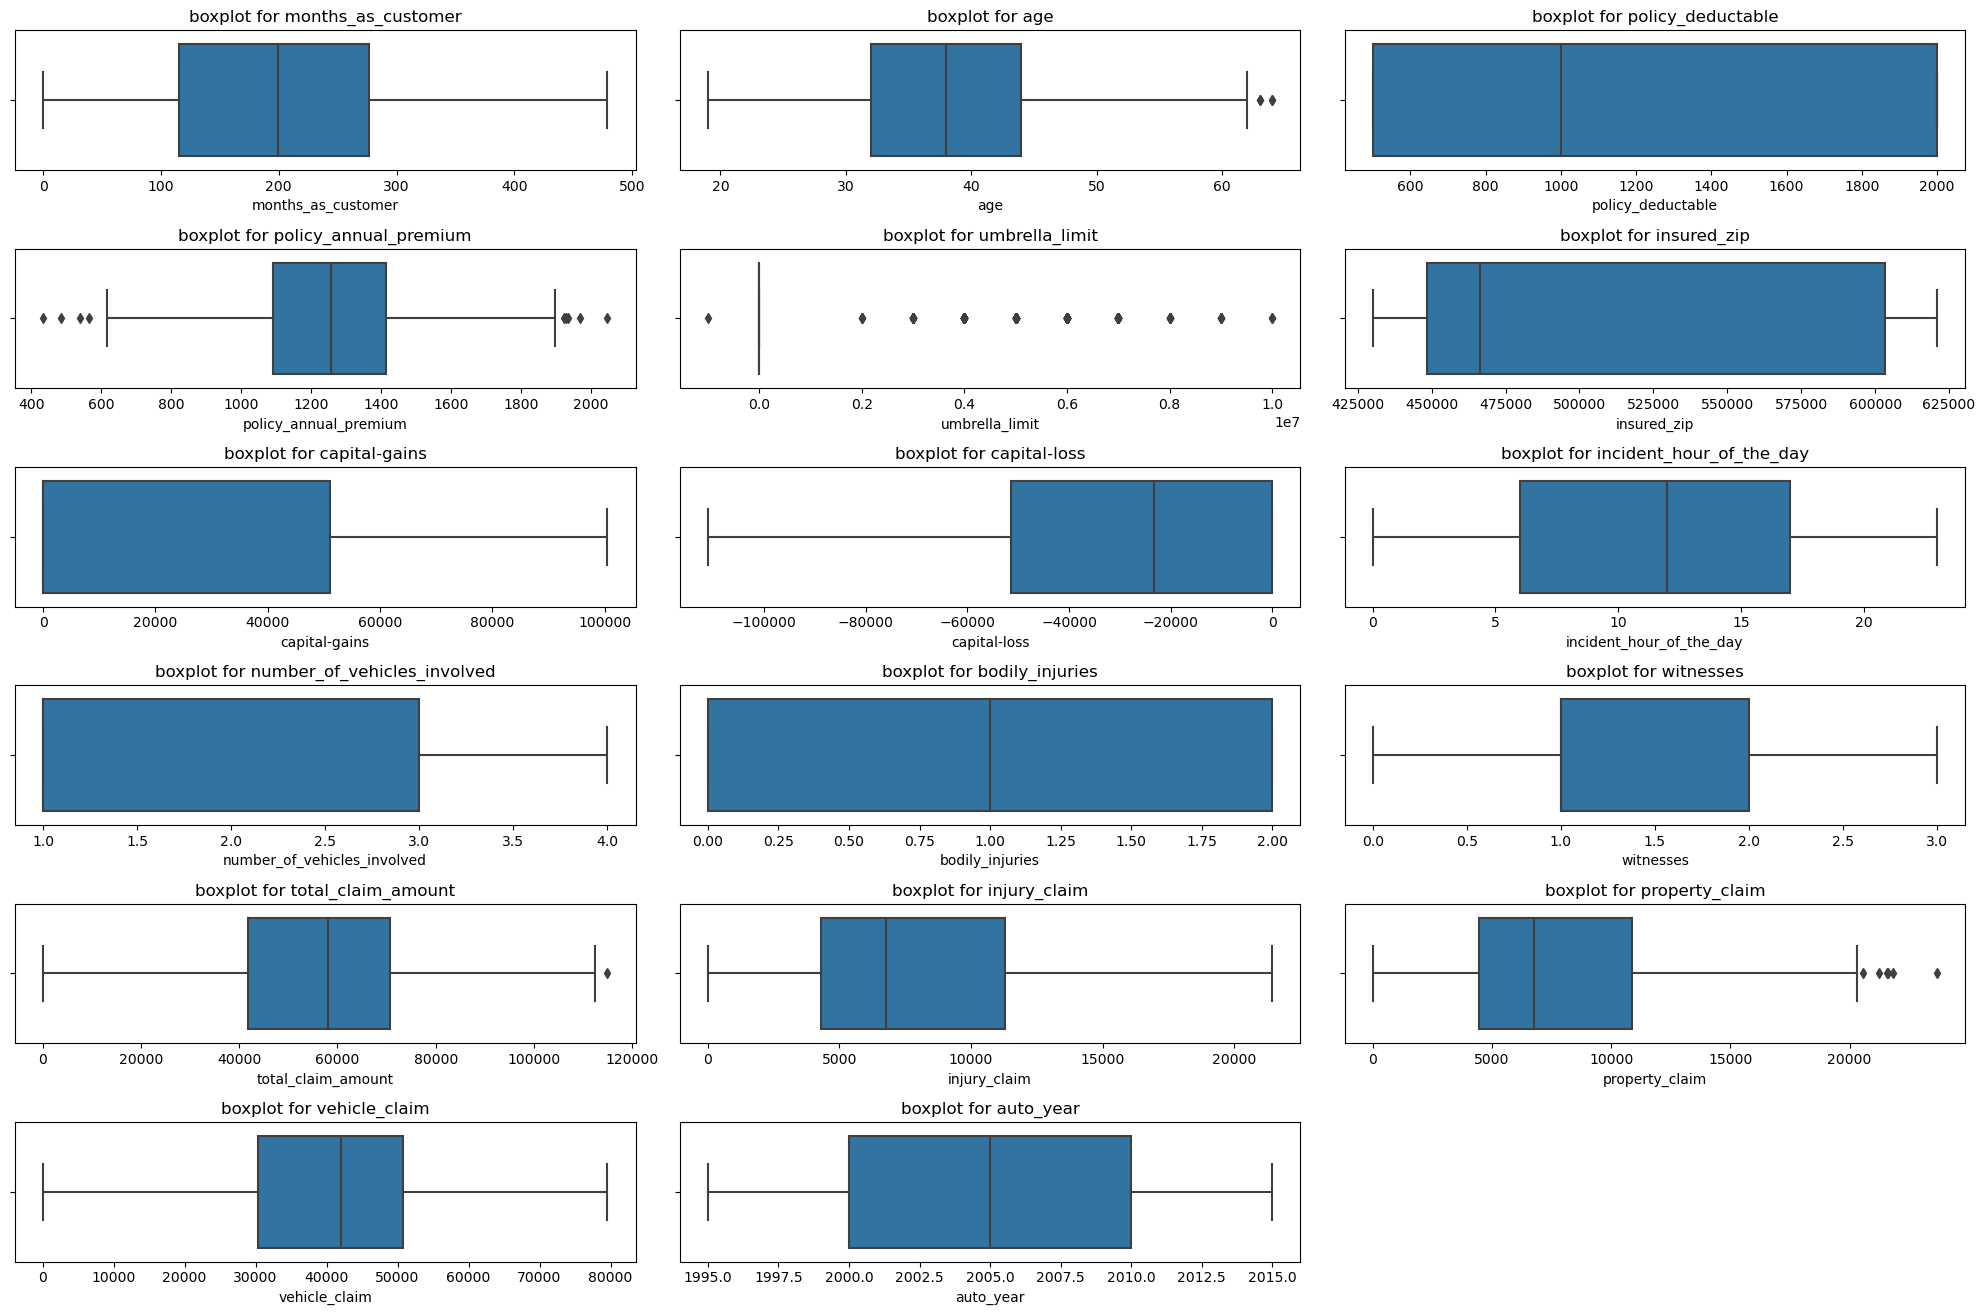

In [80]:
plt.figure(figsize=(20,15))
for num,i in enumerate(num_cols):
    plt.subplot(7,3,num+1)
    sns.boxplot(x=df[i],data=df)
    plt.title(f'boxplot for {i}')
    plt.xlabel(i)
plt.tight_layout()
plt.show()

In [83]:
df.groupby(df['umbrella_limit']>0)['fraud_reported'].value_counts()

umbrella_limit  fraud_reported
False           N                 612
                Y                 187
True            N                 141
                Y                  60
Name: fraud_reported, dtype: int64

In [95]:
df.groupby(df['policy_csl'])['fraud_reported'].value_counts()

policy_csl  fraud_reported
100/300     N                 259
            Y                  90
250/500     N                 259
            Y                  92
500/1000    N                 235
            Y                  65
Name: fraud_reported, dtype: int64

In [96]:
df.groupby(df['insured_education_level'])['fraud_reported'].value_counts()

insured_education_level  fraud_reported
Associate                N                 111
                         Y                  34
College                  N                  90
                         Y                  32
High School              N                 124
                         Y                  36
JD                       N                 119
                         Y                  42
MD                       N                 106
                         Y                  38
Masters                  N                 111
                         Y                  32
PhD                      N                  92
                         Y                  33
Name: fraud_reported, dtype: int64

In [98]:
df.groupby(df['insured_hobbies'])['fraud_reported'].value_counts()

insured_hobbies  fraud_reported
base-jumping     N                 36
                 Y                 13
basketball       N                 28
                 Y                  6
board-games      N                 34
                 Y                 14
bungie-jumping   N                 47
                 Y                  9
camping          N                 50
                 Y                  5
chess            Y                 38
                 N                  8
cross-fit        Y                 26
                 N                  9
dancing          N                 38
                 Y                  5
exercise         N                 46
                 Y                 11
golf             N                 49
                 Y                  6
hiking           N                 40
                 Y                 12
kayaking         N                 49
                 Y                  5
movies           N                 46
                 Y

In [99]:
df.groupby(df['incident_type'])['fraud_reported'].value_counts()

incident_type             fraud_reported
Multi-vehicle Collision   N                 305
                          Y                 114
Parked Car                N                  76
                          Y                   8
Single Vehicle Collision  N                 286
                          Y                 117
Vehicle Theft             N                  86
                          Y                   8
Name: fraud_reported, dtype: int64

In [102]:
df.groupby(df['incident_severity'])['fraud_reported'].value_counts()

incident_severity  fraud_reported
Major Damage       Y                 167
                   N                 109
Minor Damage       N                 316
                   Y                  38
Total Loss         N                 244
                   Y                  36
Trivial Damage     N                  84
                   Y                   6
Name: fraud_reported, dtype: int64

In [103]:
df.groupby(df['authorities_contacted'])['fraud_reported'].value_counts()

authorities_contacted  fraud_reported
Ambulance              N                 139
                       Y                  57
Fire                   N                 163
                       Y                  60
None                   N                  85
                       Y                   6
Other                  N                 135
                       Y                  63
Police                 N                 231
                       Y                  61
Name: fraud_reported, dtype: int64

In [107]:
df.groupby(df['police_report_available'])['fraud_reported'].value_counts()

police_report_available  fraud_reported
NO                       N                 257
                         Y                  86
Unknown                  N                 254
                         Y                  89
YES                      N                 242
                         Y                  72
Name: fraud_reported, dtype: int64

In [108]:
df.groupby(df['auto_make'])['fraud_reported'].value_counts()

auto_make   fraud_reported
Accura      N                 55
            Y                 13
Audi        N                 48
            Y                 21
BMW         N                 52
            Y                 20
Chevrolet   N                 55
            Y                 21
Dodge       N                 60
            Y                 20
Ford        N                 50
            Y                 22
Honda       N                 41
            Y                 14
Jeep        N                 56
            Y                 11
Mercedes    N                 43
            Y                 22
Nissan      N                 64
            Y                 14
Saab        N                 62
            Y                 18
Suburu      N                 61
            Y                 19
Toyota      N                 57
            Y                 13
Volkswagen  N                 49
            Y                 19
Name: fraud_reported, dtype: int64

In [112]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [119]:
df[df.duplicated()]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [120]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [122]:
corr=df.corr()

<Axes: >

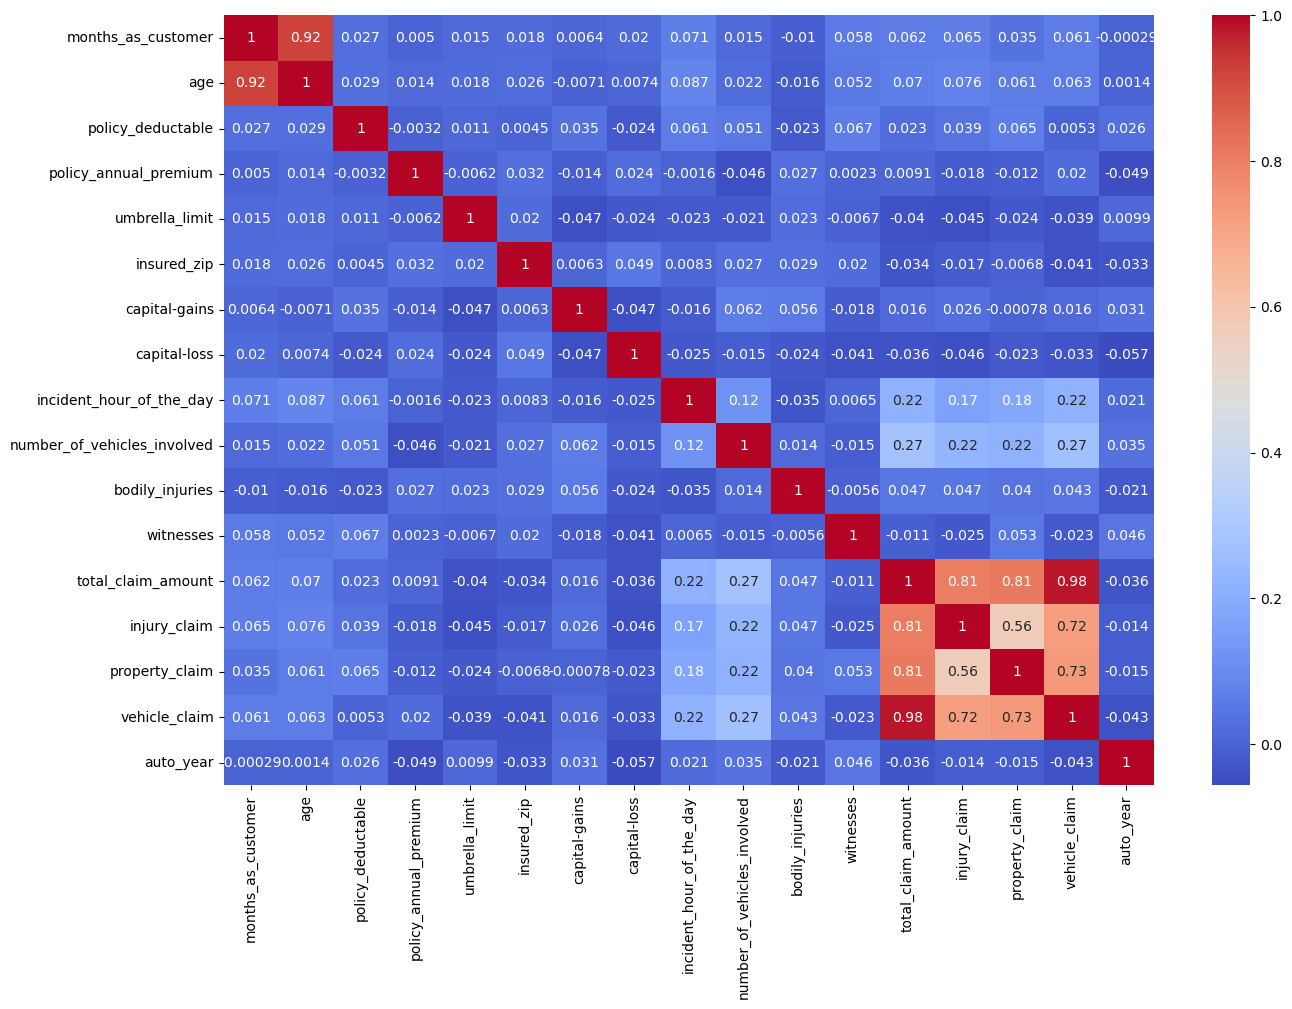

In [239]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [125]:
df.head(2)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y


In [127]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [129]:
df['policy_year']=df['policy_bind_date'].dt.year
df['incident_year']=df['incident_date'].dt.year

In [133]:
df['autoage_till_policy']=df['policy_year']-df['auto_year']

In [145]:
df['autoage_till_incident']=df['incident_year']-df['auto_year']

In [146]:
df.head(2)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_year,incident_year,autoage_till_policy,autoage_till_incident
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,13020,52080,Saab,92x,2004,Y,2014,2015,10,11
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,3510,Mercedes,E400,2007,Y,2006,2015,-1,8


In [147]:
df['autoage_till_policy'].value_counts()

 1     46
-1     45
-4     43
-9     42
-2     40
-6     39
-7     38
-8     38
-3     38
 2     38
 0     35
-11    34
 3     31
-5     28
-10    26
 5     26
-12    24
-14    24
 9     23
-15    23
 6     22
 4     22
 11    22
-13    21
-17    21
 7     20
 13    19
-19    19
 8     19
 10    17
-16    16
-20    15
 12    12
-22    11
 15    11
 14     9
-21     9
-18     9
-24     8
-23     6
 17     5
 18     3
-25     1
 19     1
 16     1
Name: autoage_till_policy, dtype: int64

In [148]:
df['autoage_till_incident'].value_counts()

20    56
16    55
10    54
9     53
4     53
8     52
12    51
6     50
5     50
2     49
13    49
0     47
18    46
3     46
7     45
1     44
14    42
15    42
17    40
11    39
19    37
Name: autoage_till_incident, dtype: int64

In [144]:
df[df['autoage_till_policy']<0]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_year,incident_year,autoage_till_policy
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,2006,2015,-1
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,2000,2015,-7
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,2015,-24
6,137,34,2000-04-06,IN,250/500,1000,1333.35,0,441716,MALE,...,21450,7150,50050,Nissan,Pathfinder,2012,N,2000,2015,-12
7,165,37,1990-03-02,IL,100/300,1000,1137.03,0,603195,MALE,...,9380,9380,32830,Audi,A5,2015,N,1990,2015,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,94,26,2007-10-24,IN,100/300,500,722.66,0,433696,MALE,...,3670,7340,25690,Nissan,Pathfinder,2010,N,2007,2015,-3
993,124,28,2001-08-12,OH,250/500,1000,1235.14,0,443567,MALE,...,6020,6020,48160,Volkswagen,Passat,2012,N,2001,2015,-11
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,17440,8720,61040,Honda,Accord,2006,N,1991,2015,-15
996,285,41,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,...,18080,18080,72320,Volkswagen,Passat,2015,N,2014,2015,-1


In [137]:
df.groupby(df['autoage_till_policy']<0)['fraud_reported'].value_counts()

autoage_till_policy  fraud_reported
False                N                 287
                     Y                  95
True                 N                 466
                     Y                 152
Name: fraud_reported, dtype: int64

In [160]:
df.groupby(df['autoage_till_incident']<10)['fraud_reported'].value_counts()

autoage_till_incident  fraud_reported
False                  N                 388
                       Y                 123
True                   N                 365
                       Y                 124
Name: fraud_reported, dtype: int64

In [166]:
df[(df['autoage_till_policy']<0) & (df['fraud_reported']=='Y')]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_year,incident_year,autoage_till_policy,autoage_till_incident
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,3510,Mercedes,E400,2007,Y,2006,2015,-1,8
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,50720,Chevrolet,Tahoe,2014,Y,1990,2015,-24,1
14,180,38,1998-12-28,OH,250/500,2000,1301.13,0,476685,FEMALE,...,8400,33600,Dodge,Neon,2003,Y,1998,2015,-5,12
15,473,58,1992-10-19,IN,100/300,2000,1131.40,0,458733,FEMALE,...,10520,42080,Accura,MDX,1999,Y,1992,2015,-7,16
22,370,55,1994-05-27,IL,100/300,2000,972.18,0,443920,MALE,...,5960,47680,Suburu,Forrestor,2000,Y,1994,2015,-6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,232,44,1994-03-10,OH,250/500,2000,1181.64,0,454552,MALE,...,11080,38780,Jeep,Grand Cherokee,2002,Y,1994,2015,-8,13
974,234,41,1990-05-16,IN,100/300,500,951.56,0,455426,FEMALE,...,7560,75600,Chevrolet,Tahoe,2007,Y,1990,2015,-17,8
977,266,42,2003-06-03,IN,100/300,500,1093.83,4000000,468454,MALE,...,8880,39960,Suburu,Impreza,2015,Y,2003,2015,-12,0
982,230,43,2007-09-02,IN,500/1000,2000,1101.83,0,451529,MALE,...,10380,36330,BMW,M5,2011,Y,2007,2015,-4,4


In [187]:
df.groupby('insured_occupation')['fraud_reported'].value_counts()

insured_occupation  fraud_reported
adm-clerical        N                 54
                    Y                 11
armed-forces        N                 52
                    Y                 17
craft-repair        N                 52
                    Y                 22
exec-managerial     N                 48
                    Y                 28
farming-fishing     N                 37
                    Y                 16
handlers-cleaners   N                 43
                    Y                 11
machine-op-inspct   N                 71
                    Y                 22
other-service       N                 59
                    Y                 12
priv-house-serv     N                 59
                    Y                 12
prof-specialty      N                 67
                    Y                 18
protective-serv     N                 49
                    Y                 14
sales               N                 55
                    Y 

In [189]:
fraud_rate=df.groupby('insured_occupation')['fraud_reported'].apply(lambda x: (x == 'Y').sum() / len(x))

In [204]:
def categorize_fraud_rate(occupation):
    rate = fraud_rate[occupation]
    if rate < 0.20:
        return 'Low Fraud Rate'
    elif 0.20 <= rate <= 0.30:
        return 'Medium Fraud Rate'
    else:
        return 'High Fraud Rate'


df['insured_occupation_grouped'] = df['insured_occupation'].apply(categorize_fraud_rate)

In [224]:
df.head(2)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,policy_year,incident_year,autoage_till_policy,autoage_till_incident,insured_occupation_grouped,auto_model_grouped
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,2014,2015,10,11,Medium Fraud Rate,Medium Fraud
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,2006,2015,-1,8,Medium Fraud Rate,Medium Fraud


In [208]:
model_fraud=df.groupby('auto_model')['fraud_reported'].apply(lambda x: (x == 'Y').sum() / len(x))

In [209]:
def categorize_model_fraud_rate(auto_model):
    rate = model_fraud[auto_model]
    if rate < 0.20:
        return 'Low Fraud'
    elif 0.20 <= rate <= 0.30:
        return 'Medium Fraud'
    else:
        return 'High Fraud'


df['auto_model_grouped'] = df['auto_model'].apply(categorize_model_fraud_rate)


df[['auto_model', 'auto_model_grouped']].head()

,auto_model,auto_model_grouped
0,92x,Medium Fraud
1,E400,Medium Fraud
2,RAM,High Fraud
3,Tahoe,High Fraud
4,RSX,Low Fraud


In [231]:
df[[col for col in df.columns if df[col].dtypes=='O']].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported,insured_occupation_grouped,auto_model_grouped
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,...,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y,Medium Fraud Rate,Medium Fraud
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Unknown,Minor Damage,...,VA,Riverwood,6608 MLK Hwy,Unknown,Unknown,Mercedes,E400,Y,Medium Fraud Rate,Medium Fraud
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,...,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N,Medium Fraud Rate,High Fraud
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,...,OH,Arlington,6956 Maple Drive,Unknown,NO,Chevrolet,Tahoe,Y,Medium Fraud Rate,High Fraud
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Unknown,Minor Damage,...,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N,Medium Fraud Rate,Low Fraud


In [240]:
auto_make_mapping = {'Saab': 0,'Dodge': 1,'Suburu': 2,'Nissan': 3,
    'Chevrolet': 4,'Ford': 5,'BMW': 6,'Toyota': 7,'Audi': 8,
    'Accura': 9,'Volkswagen': 10,'Jeep': 11,'Mercedes': 12,'Honda': 13}

df['auto_make'] = df['auto_make'].replace(auto_make_mapping)


In [237]:
df['property_damage'] = df['property_damage'].replace({'Unknown': -1,'NO': 0,'YES': 1})
df['police_report_available'] = df['police_report_available'].replace({'Unknown': -1,'NO': 0,'YES': 1})
df['collision_type'] = df['collision_type'].replace({'Rear Collision': 0,'Side Collision': 1,'Front Collision': 2,'Unknown': -1})

In [242]:
x=df.drop(['fraud_reported','autoage_till_policy','policy_year','policy_bind_date','incident_date',
           'incident_year','auto_model','insured_occupation','insured_hobbies','insured_occupation','incident_location','insured_zip'],axis=1)

In [253]:
numx=[col for col in x.columns if x[col].dtypes!='O']

In [254]:
catx=[col for col in x.columns if x[col].dtypes=='O']

In [255]:
catx

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_relationship',
 'incident_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'insured_occupation_grouped',
 'auto_model_grouped']

In [244]:
for i in x.columns:
    print(f'Value Counts for {i}')
    print(x[i].value_counts())
    print('--------------------------------------')

Value Counts for months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
--------------------------------------
Value Counts for age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
--------------------------------------
Value Counts for policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
--------------------------------------
Value Counts for policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
-------------------------------------

In [216]:
y=df['fraud_reported']

In [247]:
le=LabelEncoder()

In [249]:
y=le.fit_transform(y)

In [310]:
model_grid = [
    {'model': [DecisionTreeClassifier()]},
    {'model': [RandomForestClassifier()]},
    {'model': [xgb.XGBClassifier()]},
    {'model': [AdaBoostClassifier()]}
]

In [316]:
oe_col=['policy_csl','insured_education_level','incident_severity','insured_occupation_grouped',
 'auto_model_grouped']
ohe_col=['policy_state','insured_sex',
 'insured_relationship','incident_type','authorities_contacted','incident_state','incident_city']

ordinal_orders = {
    'policy_csl': ['100/300', '250/500', '500/1000'],
    'insured_education_level': ['High School', 'Associate','College','JD','MD','Masters', 'PhD'],
    'incident_severity': ['Trivial Damage', 'Minor Damage', 'Major Damage', 'Total Loss'],
    'insured_occupation_grouped': ['Low Fraud Rate', 'Medium Fraud Rate', 'High Fraud Rate'],
    'auto_model_grouped': ['Low Fraud', 'Medium Fraud', 'High Fraud']
}


ordenc = OrdinalEncoder(categories=[ordinal_orders[col] for col in ordinal_orders])
ohe=OneHotEncoder()

num_pipe=Pipeline(steps=[
    ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordenc, list(ordinal_orders.keys())),
        ('Onehot',ohe,ohe_col),
        ('numerical',num_pipe,numx)
    ])


pipeline = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote',SMOTE(random_state=42)),
    ('model', RandomForestClassifier())
])

In [362]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [319]:
gscv=GridSearchCV(pipeline,model_grid,cv=5,scoring='accuracy',verbose=2)

In [320]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................model=DecisionTreeClassifier(); total time=   0.5s
[CV] END .....................model=DecisionTreeClassifier(); total time=   0.0s
[CV] END .....................model=DecisionTreeClassifier(); total time=   0.0s
[CV] END .....................model=DecisionTreeClassifier(); total time=   0.0s
[CV] END .....................model=DecisionTreeClassifier(); total time=   0.0s
[CV] END .....................model=RandomForestClassifier(); total time=   0.3s
[CV] END .....................model=RandomForestClassifier(); total time=   0.3s
[CV] END .....................model=RandomForestClassifier(); total time=   0.3s
[CV] END .....................model=RandomForestClassifier(); total time=   0.3s
[CV] END .....................model=RandomForestClassifier(); total time=   0.3s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(categories=[['100/300',
                                                                                                     '250/500',
                                                                                                     '500/1000'],
                                                                                                    ['High '
                                                                                                     'School',
                                                                                                     'Associate',
                                                                                                     'College',
                                                                                                     'JD',
                                                                                                     'MD',
                                                                                                     'Masters',
                                                                                                     'PhD'],
                                                                                                    ['Trivial '
                                                                                                     'Damage',
                                                                                                     'Minor '
                                                                                                     'Damage',
                                                                                                     'Major '
                                                                                                     'Damage',
                                                                                                     'Total '
                                                                                                     'Loss'],
                                                                                                    ['Low '
                                                                                                     'Fraud '
                                                                                                     'Rate',
                                                                                                     'Medium '
                                                                                                     'Fraud '
                                                                                                     'Rate',
                                                                                                     'High '
                                                                                                     'Fraud '
                                                                                                     '...
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_

In [321]:
gscv.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)}

In [322]:
gscv.best_score_

0.79125

In [327]:
best_model=gscv.best_estimator_

In [323]:
params={
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 6, 10],
        'model__learning_rate': [0.01, 0.1, 0.2]
    }

In [363]:
gstuning=GridSearchCV(best_model,params,cv=5,scoring='accuracy',verbose=2)

In [364]:
gstuning.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200; total time=   0.2s
[CV] END model__learning_rate=0.01, mo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(categories=[['100/300',
                                                                                                     '250/500',
                                                                                                     '500/1000'],
                                                                                                    ['High '
                                                                                                     'School',
                                                                                                     'Associate',
                                                                                                     'College',
                                                                                                     'JD',
                                                                                                     'MD',
                                                                                                     'Masters',
                                                                                                     'PhD'],
                                                                                                    ['Trivial '
                                                                                                     'Damage',
                                                                                                     'Minor '
                                                                                                     'Damage',
                                                                                                     'Major '
                                                                                                     'Damage',
                                                                                                     'Total '
                                                                                                     'Loss'],
                                                                                                    ['Low '
                                                                                                     'Fraud '
                                                                                                     'Rate',
                                                                                                     'Medium '
                                                                                                     'Fraud '
                                                                                                     'Rate',
                                                                                                     'High '
                                                                                                     'Fraud '
                                                                                                     '...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                     

In [365]:
gstuning.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 3,
 'model__n_estimators': 200}

In [373]:
gstuning.best_score_

0.82125

In [368]:
final_model=gstuning.best_estimator_

In [369]:
pred=final_model.predict(x_test)

In [372]:
accuracy_score(y_test,pred)

0.78

In [399]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       145
           1       0.60      0.62      0.61        55

    accuracy                           0.78       200
   macro avg       0.72      0.73      0.73       200
weighted avg       0.78      0.78      0.78       200



In [400]:
newdata=x[150:170]

In [401]:
newpred=final_model.predict(newdata)

In [410]:
counter=0
print('Actual Value       |       Predicted Value')
for i in range(150, 170):
    print(f'{y[i]}                  |              {newpred[counter]}')
    counter+=1

Actual Value       |       Predicted Value
0                  |              0
0                  |              1
1                  |              0
0                  |              0
1                  |              0
1                  |              1
0                  |              0
0                  |              0
0                  |              0
0                  |              0
0                  |              0
0                  |              0
0                  |              0
1                  |              1
0                  |              0
0                  |              0
1                  |              1
0                  |              0
0                  |              0
0                  |              0
